In [ ]:
!pip install --upgrade tensorflow keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import os
import math

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'


Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7461 - loss: 0.9432 - val_accuracy: 0.8426 - val_loss: 0.6149 - learning_rate: 5.0000e-04
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8522 - loss: 0.5978 - val_accuracy: 0.8637 - val_loss: 0.5499 - learning_rate: 5.0000e-04
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8689 - loss: 0.5494 - val_accuracy: 0.8602 - val_loss: 0.5557 - learning_rate: 5.0000e-04
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8761 - loss: 0.5167 - val_accuracy: 0.8587 - val_loss: 0.5471 - learning_rate: 5.0000e-04
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8820 - loss: 0.4921 - val_accuracy: 0.8624 - val_loss: 0.5482 - learning_rate: 5.0000e-04
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8868 - loss: 0.4716 - val_accuracy: 0.8611 - val_loss: 0.5469 - learning_rate: 5.0000e-04
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - 

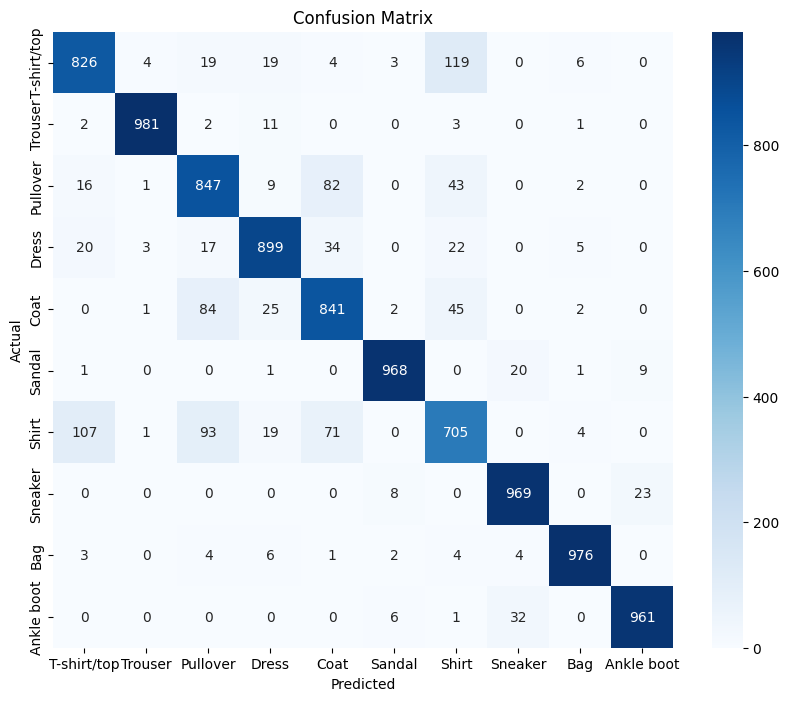

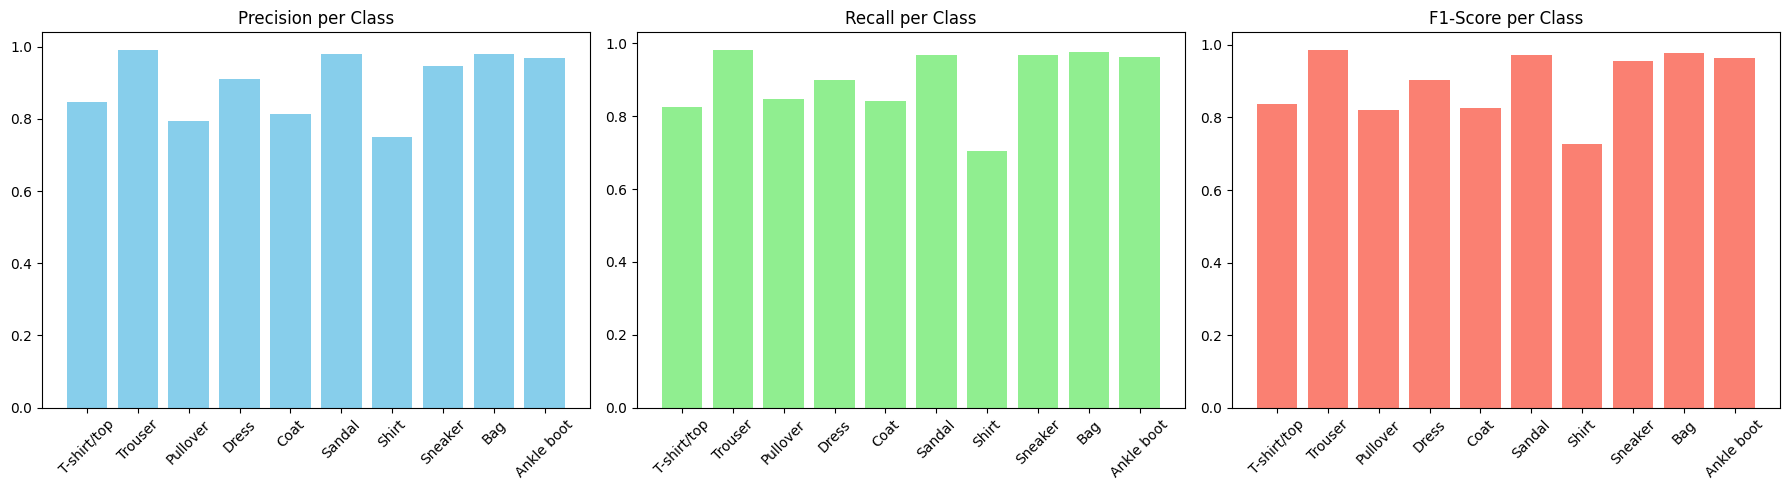

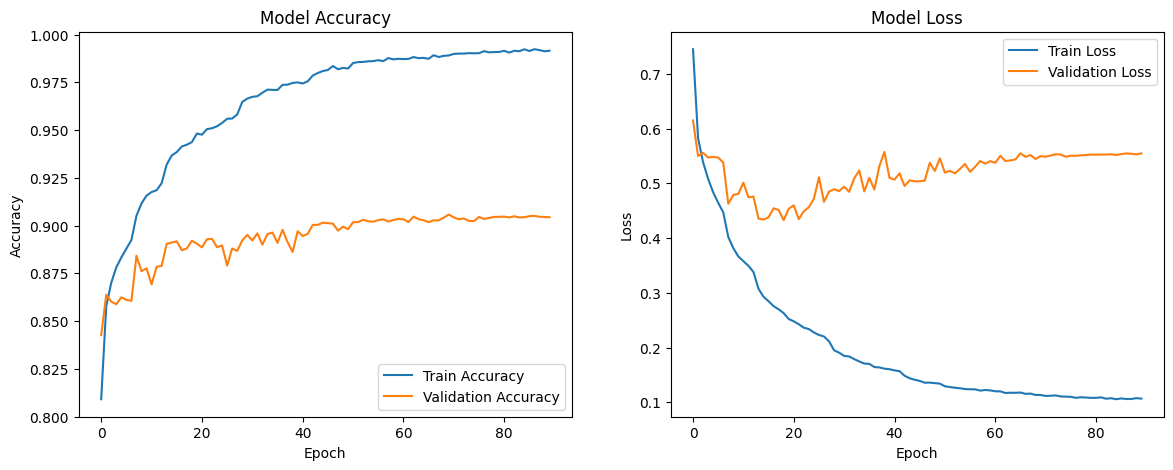

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import math

# Set the random seed values for reproducibility
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Load and preprocess the data
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# Normalize images
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

# Flatten images
x_train_full_flat = x_train_full.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Split into training and validation sets
x_train_flat, x_val_flat, y_train, y_val = train_test_split(
    x_train_full_flat, y_train_full, test_size=0.2, random_state=seed_value
)

model = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(2048, kernel_regularizer=regularizers.l2(0.00005)),
    layers.BatchNormalization(),
    layers.Activation('swish'),
    layers.Dropout(0.3),
    layers.Dense(1024, kernel_regularizer=regularizers.l2(0.00005)),
    layers.BatchNormalization(),
    layers.Activation('swish'),
    layers.Dropout(0.3),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.00005)),
    layers.BatchNormalization(),
    layers.Activation('swish'),
    layers.Dropout(0.3),
    layers.Dense(256, kernel_regularizer=regularizers.l2(0.00005)),
    layers.BatchNormalization(),
    layers.Activation('swish'),
    layers.Dropout(0.3),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.00005)),
    layers.BatchNormalization(),
    layers.Activation('swish'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile the model with a lower learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Set up callbacks
lr_reduction = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=5,
    factor=0.5,
    min_lr=1e-7
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    x_train_flat, y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val_flat, y_val),
    callbacks=[early_stopping, lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Generate classification report and confusion matrix
# Map of class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Predict the classes on the test set
y_pred_probs = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report
print('\nClassification Report')
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Bar graph for precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes)
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.bar(class_names, precision, color='skyblue')
plt.xticks(rotation=45)
plt.title('Precision per Class')

plt.subplot(1,3,2)
plt.bar(class_names, recall, color='lightgreen')
plt.xticks(rotation=45)
plt.title('Recall per Class')

plt.subplot(1,3,3)
plt.bar(class_names, f1_score, color='salmon')
plt.xticks(rotation=45)
plt.title('F1-Score per Class')

plt.tight_layout()
plt.show()

# Visualize training history
# Plot training & validation accuracy and loss values
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()
